In [2]:
import torch
import numpy as np
import re
import matplotlib.pyplot as plt
import pickle

import pandas as pd
import seaborn as sns
from ast import literal_eval
from ensemblecalibration.utils.plot_functions import plot_error_analysis

In [3]:
sns.set_palette("viridis")

df_results_mlp_dirichlet_brier = pd.read_csv(
    "../results/dirichlet/2024-08-05-02-07-18/t1t2_brier_dirichlet_100.csv"
)
df_results_mlp_cobyla = pd.read_csv(
    "../results/dirichlet/2024-08-06-14-19-51/t1t2_cobyla_mlp_100.csv"
)

df_results_mlp_dirichlet_brier_new = pd.read_csv(
    "../results/dirichlet/2024-08-09-18-45-53/t1t2_mlp_brier_lp_skce_dirichlet_100.csv"
)

df_results_dirichlet_slsqp = pd.read_csv("../results/dirichlet/2024-08-13-16-38-58/t1t2_slsqp_brier_lp_skce_100.csv")

# read the pkl confg file
with open("../results/dirichlet/2024-08-09-18-45-53/config.pkl", "rb") as f:
    config = pickle.load(f)

In [4]:
config

{'Brier': {'experiment': 'dirichlet',
  'test': <function ensemblecalibration.cal_test.bootstrap_test.npbe_test_ensemble(alpha: list, x_inst: numpy.ndarray, p_preds: numpy.ndarray, y_labels: numpy.ndarray, params: dict)>,
  'params': {'optim': 'mlp',
   'n_samples': 1000,
   'n_resamples': 100,
   'n_classes': 5,
   'n_members': 5,
   'bw': 0.1,
   'obj': <function ensemblecalibration.cal_estimates.brier.brier_obj(p_bar: numpy.ndarray, y: numpy.ndarray, params: dict)>,
   'obj_lambda': <function ensemblecalibration.cal_estimates.brier.brier_obj_lambda(weights_l, p_probs, y_labels, params, x_dep: bool = False)>,
   'loss': BrierLoss(),
   'n_epochs': 400,
   'lr': 0.0001,
   'batch_size': 256,
   'patience': 100,
   'hidden_layers': 3,
   'hidden_dim': 32,
   'x_dep': True,
   'deg': 2,
   'x_bound': [0.0, 5.0]}},
 'LP': {'experiment': 'dirichlet',
  'test': <function ensemblecalibration.cal_test.bootstrap_test.npbe_test_ensemble(alpha: list, x_inst: numpy.ndarray, p_preds: numpy.ndarra

In [5]:
df_results_mlp_dirichlet_brier_t1 = df_results_mlp_dirichlet_brier.iloc[:2,:3]
df_results_mlp_dirichlet_brier_t2 = df_results_mlp_dirichlet_brier.iloc[2:,:3]

df_results_mlp_cobyla_t1 = df_results_mlp_cobyla.iloc[:2,:3]
df_results_mlp_cobyla_t2 = df_results_mlp_cobyla.iloc[2:,:3]

df_results_mlp_dirichlet_brier_new_t1 = df_results_mlp_dirichlet_brier_new.iloc[:2,:3]
df_results_mlp_dirichlet_brier_new_t2 = df_results_mlp_dirichlet_brier_new.iloc[2:,:3]

df_results_slsqp_t1 = df_results_dirichlet_slsqp.iloc[:2,:3]
df_results_dirichlet_slsqp_t2 = df_results_dirichlet_slsqp.iloc[2:,:3]

In [6]:
list_col_titles = [
        "$H_0, \lambda=const$",
        "$H_0, \lambda=f(x)$",
        "$H_1, S_1$",
        "$H_1, S_2$",
        "$H_1, S_3$",
    ]

<>:2: SyntaxWarning: invalid escape sequence '\l'
<>:3: SyntaxWarning: invalid escape sequence '\l'
<>:2: SyntaxWarning: invalid escape sequence '\l'
<>:3: SyntaxWarning: invalid escape sequence '\l'
/var/folders/mf/gnm849bj4fq5xnqhl_bdhf9m0000gn/T/ipykernel_42291/3377379907.py:2: SyntaxWarning: invalid escape sequence '\l'
  "$H_0, \lambda=const$",
/var/folders/mf/gnm849bj4fq5xnqhl_bdhf9m0000gn/T/ipykernel_42291/3377379907.py:3: SyntaxWarning: invalid escape sequence '\l'
  "$H_0, \lambda=f(x)$",


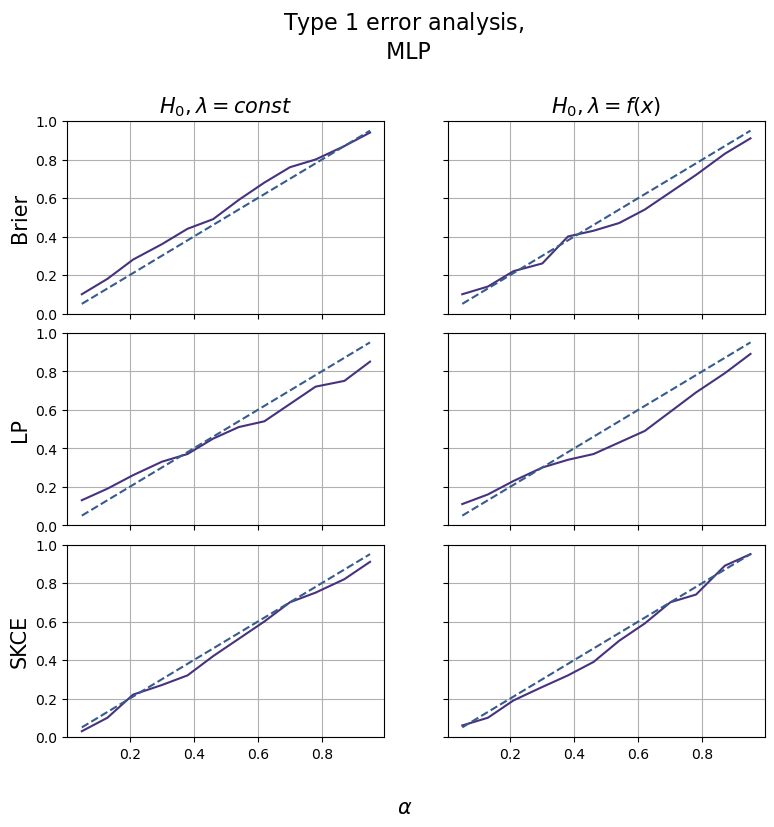

In [9]:
fig_t1 = plot_error_analysis(
    df=df_results_mlp_dirichlet_brier_new_t1,
    list_errors=df_results_mlp_dirichlet_brier_new_t1.columns,
    figsize=(9, 8),
    title="Type $1$ error analysis, \n MLP",
    list_col_titles=list_col_titles[:2],

)
plt.savefig("../../figures/t1_dirichlet_brier_lp_skce_mlp.pdf", bbox_inches="tight", dpi=300)


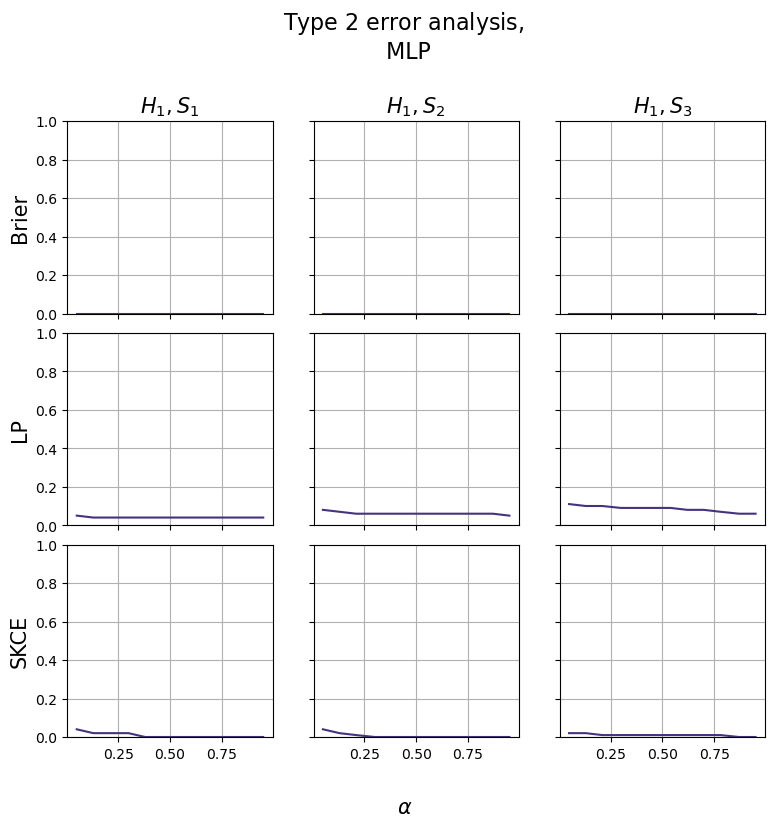

In [11]:
fig_t2 = plot_error_analysis(
    df=df_results_mlp_dirichlet_brier_new_t2,
    list_errors=df_results_mlp_dirichlet_brier_new_t2.columns,
    figsize=(9, 8),
    title="Type $2$ error analysis, \n MLP",
    list_col_titles=list_col_titles[2:],
    scatter_line=False
)

plt.savefig("../../figures/t2_dirichlet_brier_lp_skce_mlp.pdf", bbox_inches="tight", dpi=300)

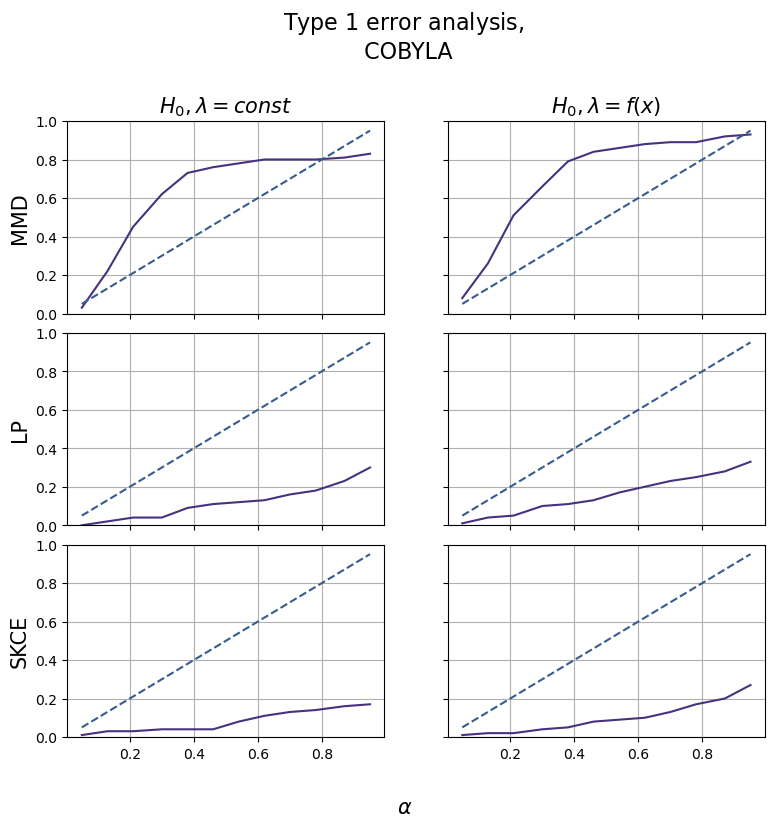

In [17]:
fig_t1_cobyla = plot_error_analysis(
    df=df_results_mlp_cobyla_t1,
    list_errors=df_results_mlp_cobyla_t1.columns,
    figsize=(9, 8),
    title="Type $1$ error analysis, \n COBYLA",
    list_col_titles=list_col_titles[:2],
)

plt.savefig("../../figures/t1_dirichlet_cobyla_mlp.pdf", bbox_inches="tight")

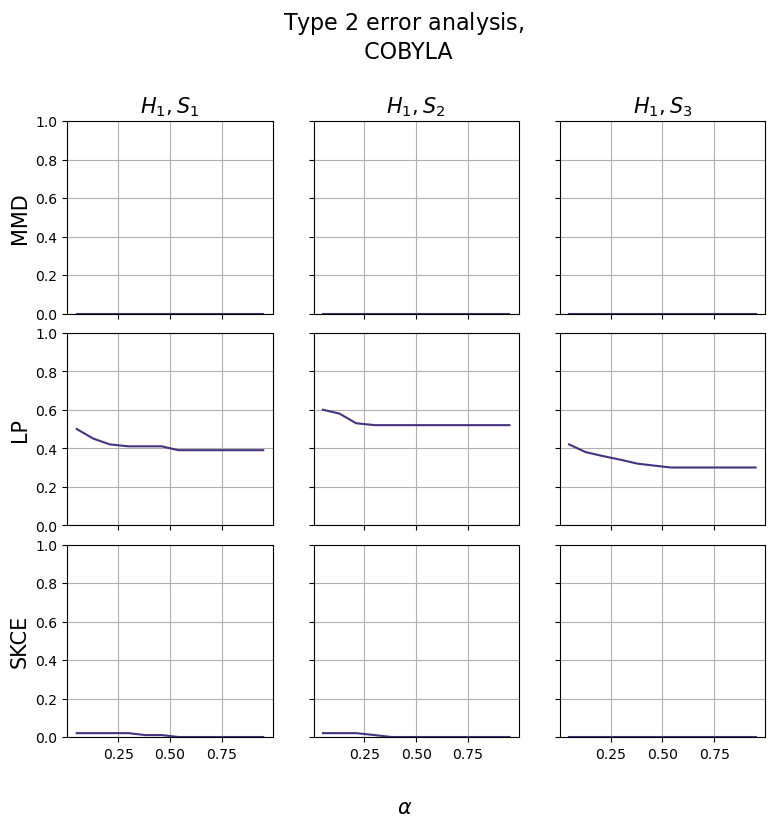

In [18]:
fig_t2_cobyla = plot_error_analysis(
    df=df_results_mlp_cobyla_t2,
    list_errors=df_results_mlp_cobyla_t2.columns,
    figsize=(9, 8),
    title="Type $2$ error analysis, \n COBYLA",
    list_col_titles=list_col_titles[2:],
    scatter_line=False
)

plt.savefig("../../figures/t2_dirichlet_cobyla_mlp.pdf", bbox_inches="tight")

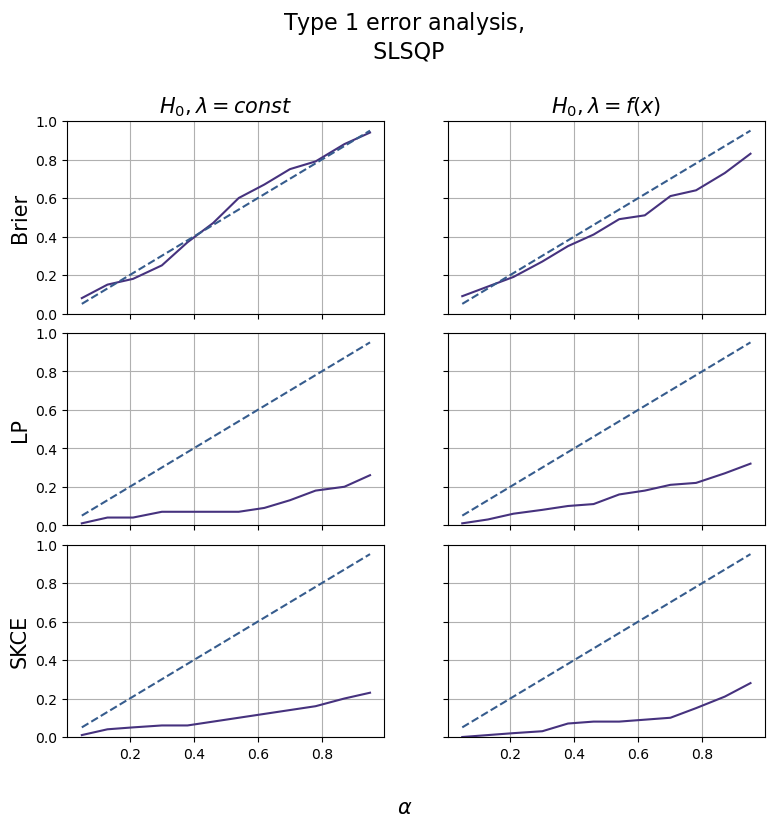

In [12]:
fig_t1_slsqp = plot_error_analysis(
    df=df_results_slsqp_t1,
    list_errors=df_results_slsqp_t1.columns,
    figsize=(9, 8),
    title="Type $1$ error analysis, \n SLSQP",
    list_col_titles=list_col_titles[:2],
)

plt.savefig("../../figures/t1_dirichlet_slsqp.pdf", bbox_inches="tight", dpi=300)

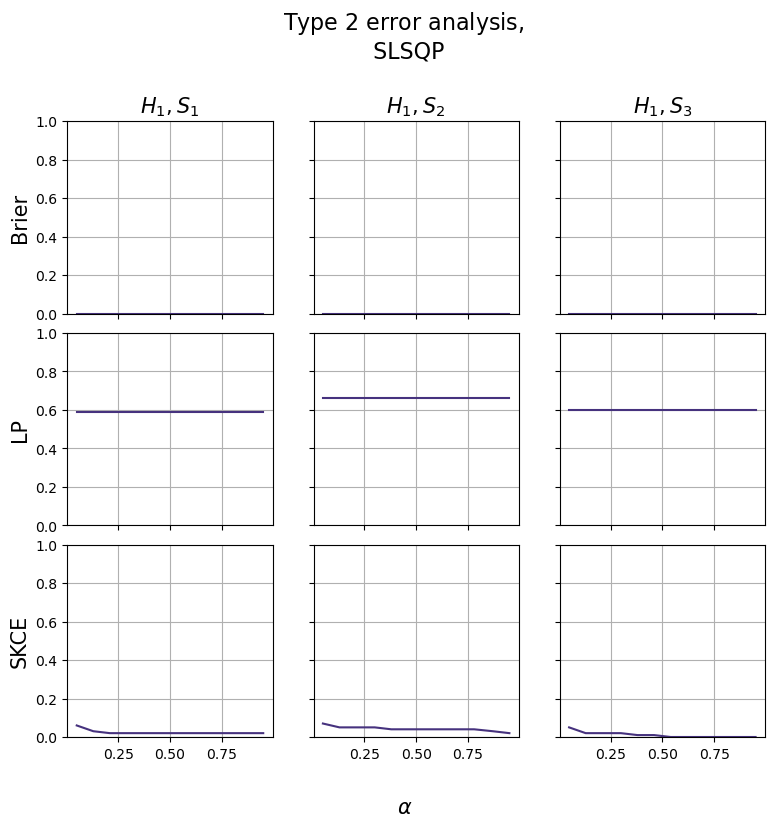

In [13]:
fig_t2_slsqp = plot_error_analysis(
    df=df_results_dirichlet_slsqp_t2,
    list_errors=df_results_dirichlet_slsqp_t2.columns,
    figsize=(9, 8),
    title="Type $2$ error analysis, \n SLSQP",
    list_col_titles=list_col_titles[2:],
    scatter_line=False
)

plt.savefig("../../figures/t2_dirichlet_slsqp.pdf", bbox_inches="tight", dpi=300)